<a href="https://colab.research.google.com/github/Ruvindya/Machine-Learning/blob/main/Nearest_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [111]:
iris_data = load_iris()

# Access the column names
column_names = iris_data.feature_names

# Print the column names
print(column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [112]:
# Convert iris data into a DataFrame with column names
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable to the DataFrame
df['target'] = iris_data.target

# Display the DataFrame
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [113]:
print("Data types: ")
df.dtypes

Data types: 


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [115]:
# Check for zero values are in columns
zero_values = (df == 0).any()

# Display the columns with zero values
print(zero_values)

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target                True
dtype: bool


In [116]:
normalized = (df.min() >= 0) & (df.max() <= 1)

# Display the columns indicating whether they are normalized
print(normalized)

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool


In [117]:
# Assuming you have a DataFrame named df
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [118]:
normalized_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [119]:
normalized = (normalized_df.min() >= 0) & (normalized_df.max() <= 1)

# Display the columns indicating whether they are normalized
print(normalized)

sepal length (cm)    True
sepal width (cm)     True
petal length (cm)    True
petal width (cm)     True
target               True
dtype: bool


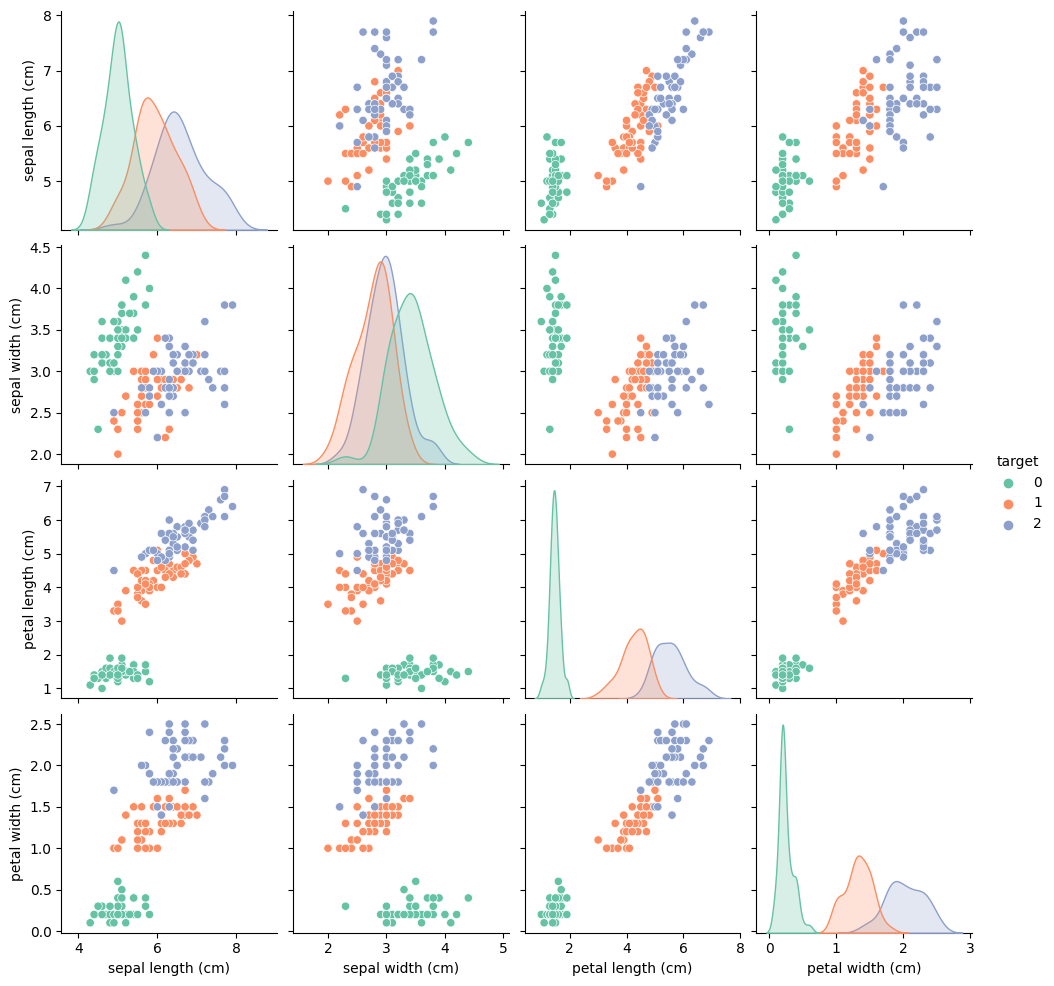

In [120]:
sns.pairplot(data=df,hue="target",palette="Set2")
plt.show()

In [121]:
#Adjusting the Dataset for Unsupervised Learning
#now, we don't know the real labels or amount of labels
target= normalized_df['target']
features = normalized_df.loc[:,['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]


In [122]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [123]:
#apply the unsupervised learning algorithm
#Here in algorithm have: BallTree, KDTree or Brute-force ; to compute the nearest neighbors
#If we provide ‘auto’, it will attempt to decide the most appropriate algorithm based on the values passed to fit method.
nrst_neigh = NearestNeighbors(n_neighbors = 3, algorithm = 'auto')

In [124]:
#fit the model with input data set.
nrst_neigh.fit(X_train)

NearestNeighbors(n_neighbors=3)

In [125]:
#finding the K-neighbors of data set.
#It will return the indices and distances of the neighbors of each point.
distances, indices = nrst_neigh.kneighbors(X_train)
indices

array([[  0,  75, 102],
       [  1,  41, 117],
       [  2,  18,  12],
       [  3,  31,  57],
       [  4,  38,  70],
       [  5,  30,  50],
       [  6,  12,   2],
       [  7,  23,  26],
       [  8, 102,  23],
       [  9,  41,  84],
       [ 43,  10, 112],
       [ 11,  59,   6],
       [ 12, 105,   2],
       [ 13,  48,  14],
       [ 14,  94,  84],
       [ 15,  53,  88],
       [ 16,  80,  62],
       [ 17, 109, 107],
       [ 18,   2,  92],
       [ 19, 100,  61],
       [ 20, 108,  95],
       [ 21,  24,  64],
       [ 22,  45,  86],
       [ 23,   7,  71],
       [ 24,  21, 106],
       [ 25, 118,  88],
       [ 26,  35,   7],
       [ 27,  71,  23],
       [ 28,  98,  84],
       [ 29,  49,  99],
       [ 30,  81,  50],
       [ 31,   3,  57],
       [ 32, 104,  55],
       [ 33,  58,  71],
       [ 34, 108,  93],
       [ 35,  57,  26],
       [ 36,  95,  20],
       [ 37,  19,  21],
       [ 38,  78,  70],
       [ 39, 111, 115],
       [ 40,  43,  10],
       [ 41,   9

In [126]:
#This show a connection between neighboring points
nrst_neigh.kneighbors_graph(X_train).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [127]:
# Find the nearest neighbors of the test data
test_distances, test_indices = nrst_neigh.kneighbors(X_test)

# Print the indices of the nearest neighbors for each test data point
print(test_indices)

[[ 79  39  90]
 [ 48  14  13]
 [ 24  21  64]
 [ 79  90  86]
 [ 92  80  18]
 [114  26  71]
 [ 95 108  20]
 [ 85 103  61]
 [110  68  73]
 [118 108  34]
 [ 87  17  97]
 [104  55  32]
 [114   7  14]
 [ 55 104  32]
 [ 84  98  28]
 [  6  11  12]
 [ 76 103  83]
 [ 53  15 118]
 [ 20 108  34]
 [ 87  50  76]
 [ 38  78  70]
 [ 42 113  81]
 [ 33  71  27]
 [ 50  87 107]
 [ 37  19  69]
 [103  76  85]
 [ 50   5 107]
 [ 61 103  97]
 [104  55  32]
 [ 55  70 104]]


In [128]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,0.083333,0.666667,0.000000,0.041667
15,0.388889,1.000000,0.084746,0.125000
65,0.666667,0.458333,0.576271,0.541667
11,0.138889,0.583333,0.101695,0.041667
42,0.027778,0.500000,0.050847,0.041667
...,...,...,...,...
71,0.500000,0.333333,0.508475,0.500000
106,0.166667,0.208333,0.593220,0.666667
14,0.416667,0.833333,0.033898,0.041667
92,0.416667,0.250000,0.508475,0.458333


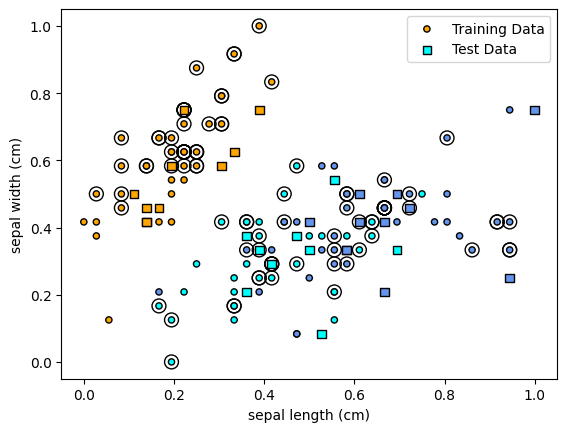

In [129]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Create a colormap
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

# Extract the column names for plotting
x_column_name = 'sepal length (cm)'  # Specify the name of the desired x-axis column
y_column_name = 'sepal width (cm)'   # Specify the name of the desired y-axis column

# Plot the training data
plt.scatter(X_train[x_column_name], X_train[y_column_name], c=y_train, cmap=cmap_light, edgecolor='k', s=20, label='Training Data')

# Plot the test data
plt.scatter(X_test[x_column_name], X_test[y_column_name], c=y_test, cmap=cmap_light, edgecolor='k', s=40, marker='s', label='Test Data')

# Plot the nearest neighbors
for i in range(len(X_test)):
    neighbors = X_train.iloc[indices[i]]
    plt.scatter(neighbors[x_column_name], neighbors[y_column_name], facecolors='none', edgecolors='black', s=100)

plt.xlabel(x_column_name)
plt.ylabel(y_column_name)
plt.legend()
plt.show()


In [148]:
import numpy as np

# Assuming you have the following variables defined:
# X_train: Training data
# y_train: True labels for the training data
# indices: Indices of the nearest neighbors

# Reset the index of X_train and y_train
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Manually calculate the predicted labels based on the majority class of nearest neighbors
predicted_labels = []
for neighbor_indices in indices:
    neighbor_labels = y_train_reset.loc[neighbor_indices]  # Get the labels of the nearest neighbors
    # Count the occurrences of each class label and select the one with the highest count
    label_counts = np.bincount(neighbor_labels)
    predicted_label = np.argmax(label_counts)
    predicted_labels.append(predicted_label)

# Convert the predicted labels to a NumPy array
predicted_labels = np.array(predicted_labels)


In [151]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder

# Assuming you have the following variables defined:
# y_test: True labels for the test data
# predicted_labels: Predicted labels obtained from the nearest neighbors

# Create a label encoder and fit it on the true labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate TP, TN, FP, FN
tp = sum((predicted_labels == 1) & (y_test_encoded == 1))
tn = sum((predicted_labels == 0) & (y_test_encoded == 0))
fp = sum((predicted_labels == 1) & (y_test_encoded == 0))
fn = sum((predicted_labels == 0) & (y_test_encoded == 1))

# Print TP, TN, FP, FN
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Create a confusion matrix
confusion = confusion_matrix(y_test_encoded, predicted_labels)
print("Confusion Matrix:")
print(confusion)

# Create a classification report
classification_rep = classification_report(y_test_encoded, predicted_labels)
print("Classification Report:")
print(classification_rep)


True Positives (TP): 0
True Negatives (TN): 10
False Positives (FP): 0
False Negatives (FN): 9
Confusion Matrix:
[[10  0  0]
 [ 9  0  0]
 [ 0 11  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.18      0.33      0.23        30
weighted avg       0.18      0.33      0.23        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
